# Traccia:

In [2]:
import pandas as pd
import numpy as np

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

1. Caricare il dataset "winemag-data_first150k.csv" all'interno di un DataFrame pandas


In [4]:
df = pd.read_csv('data/winemag-data_first150k.csv',)
df.columns
df.head(5)

,id,country,description,designation,points,price,province,region_1,region_2,variety,winery
0,0,US,This tremendous 100% varietal wine hails from ...,Martha's Vineyard,96,235.0,California,Napa Valley,Napa,Cabernet Sauvignon,Heitz
1,1,Spain,"Ripe aromas of fig, blackberry and cassis are ...",Carodorum Selección Especial Reserva,96,110.0,Northern Spain,Toro,NaN,Tinta de Toro,Bodega Carmen Rodríguez
2,2,US,Mac Watson honors the memory of a wine once ma...,Special Selected Late Harvest,96,90.0,California,Knights Valley,Sonoma,Sauvignon Blanc,Macauley
3,3,US,"This spent 20 months in 30% new French oak, an...",Reserve,96,65.0,Oregon,Willamette Valley,Willamette Valley,Pinot Noir,Ponzi
4,4,France,"This is the top wine from La Bégude, named aft...",La Brûlade,95,66.0,Provence,Bandol,NaN,Provence red blend,Domaine de la Bégude


2. Visualizzare tramite un bar plot le 10 province dalle quali si producono più vini (ovvero con un conteggio di vini maggiore). Cosa si evince dal grafico?

In [ ]:
province_more_wine = df.groupby(["province"]).count().winery
province_more_wine_sorted = province_more_wine.sort_values(ascending=False)[0:11]
plt.bar(province_more_wine_sorted.index,province_more_wine_sorted)

plt.tick_params(axis='x',rotation=90)

# There is a big difference between the first one and the others

3. Visualizzare tramite un bar plot le 10 province dalle quali si producono più vini. Visualizzare questa volta dati percentuali. Cosa si evince dal grafico?

In [ ]:
province_more_wine = df.groupby(["province"]).count().winery
province_more_wine = (province_more_wine / len(df)) * 100
province_more_wine_sorted = province_more_wine.sort_values(ascending=False)[0:11]
plt.bar(province_more_wine_sorted.index,province_more_wine_sorted)

plt.tick_params(axis='x',rotation=90)

4. Visualizzare tramite un bar plot il conteggio dei voti (colonna points) assegnati alle varie recensioni. Qual è il voto che è stato assegnato al maggior numero di recensioni?

In [ ]:
points = df.groupby(["points"]).count().id
plt.bar(points.index,points)

# 87 is the vote most assigned

5. Modificare il grafico precedente in modo da visualizzare i voti in senso crescente.

In [ ]:
points = points.sort_index(ascending=True)
plt.bar(points.index,points)

6. Visualizzare la stessa informazione del grafico del punto 8 con un grafico a linea

In [ ]:
plt.plot(points.index,points)

7. Visualizzare con un istogramma la frequenza dei voti assegnati nelle varie recensioni.  Visualizzare il grafico anche con seaborn.

In [ ]:
df['points'].plot.hist(bins=10)

8. Visualizzare con un istogramma la frequenza del prezzo dei vini.

In [ ]:
df['price'].plot.hist(bins=3)

9. Visualizzare con un istogramma la frequenza del prezzo dei vini che costano meno di 200 dollari.

In [ ]:
wine_less_than_200 = df[df['price'] < 200]
wine_less_than_200['price'].plot.hist()

10. Visualizzare con uno scatter plot la relazione che sussiste tra voti assegnati nelle recensioni e prezzo del vino. Selezionare un sample di 100 elementi. Cosa è possibile notare? Visualizzare il grafico anche con seaborn.

In [ ]:
sample = df.sample(100)
plt.scatter(sample['points'],sample['price'])

sns.scatterplot(x='points', y='price', data=sample)


11. Selezionare le sole recensioni che si riferiscono alle seguenti varietà di vini: "Bordeaux-style Red Blend", "Cabernet Sauvignon", "Chardonnay", "Pinot Noir", "Red Blend". Raggruppare i vini per voto e varietà e conteggiarli (usare un group by). Visualizzare questa informazione con un bar plot stacked.

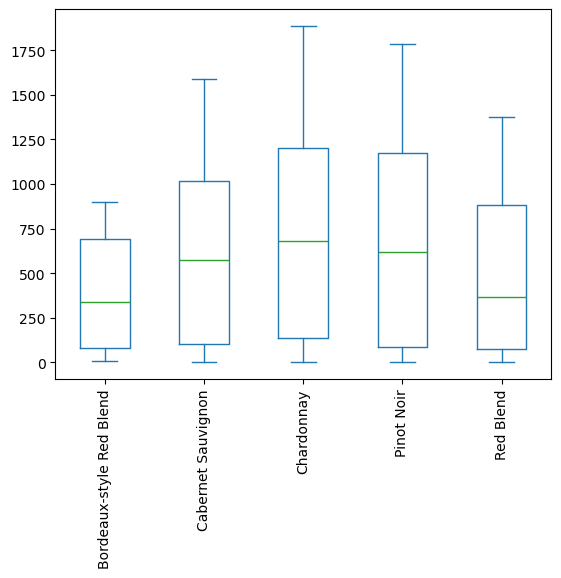

In [9]:
vini = ["Bordeaux-style Red Blend", "Cabernet Sauvignon", "Chardonnay", "Pinot Noir", "Red Blend"]

df_new = df[df['variety'].isin(vini)].groupby(["points","variety"]).size().unstack()
df_new.plot.box()

plt.tick_params(axis='x',rotation=90)

12. Visualizzare l'informazione precedente con un plot area ed un line chart.

<Axes: xlabel='points'>

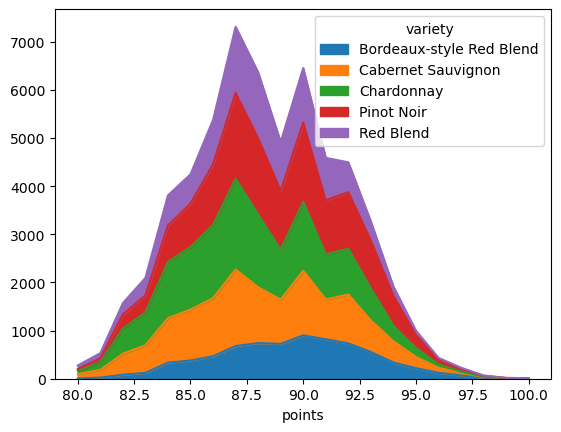

In [10]:
df_new.plot.area()

<Axes: xlabel='points'>

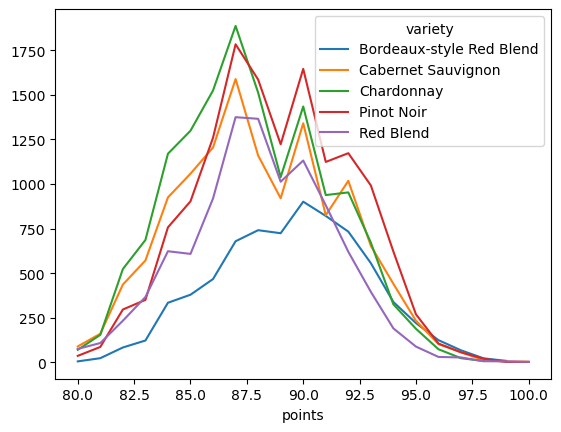

In [11]:
df_new.plot.line()

13. Visualizzare con un box plot (con seaborn) la distribuzione dei voti per le 5 varietà di vini "Bordeaux-style Red Blend", "Cabernet Sauvignon", "Chardonnay", "Pinot Noir", "Red Blend".

<Axes: xlabel='variety'>

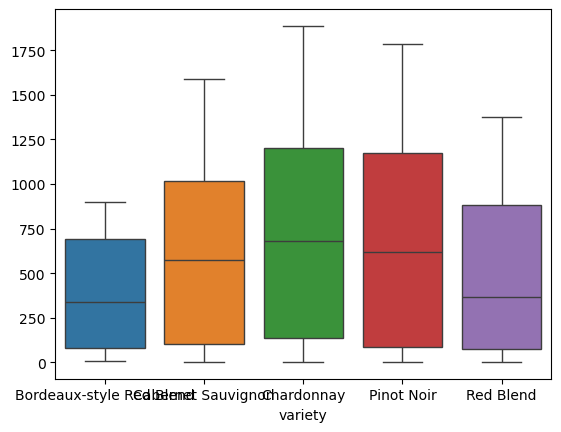

In [13]:
sns.boxplot(df_new)


14. Visualizzare con seaborn un istogramma relativo alla frequenza di voti per ognuna delle 5 varietà di vini precedenti. Utilizzare FacetGrid.

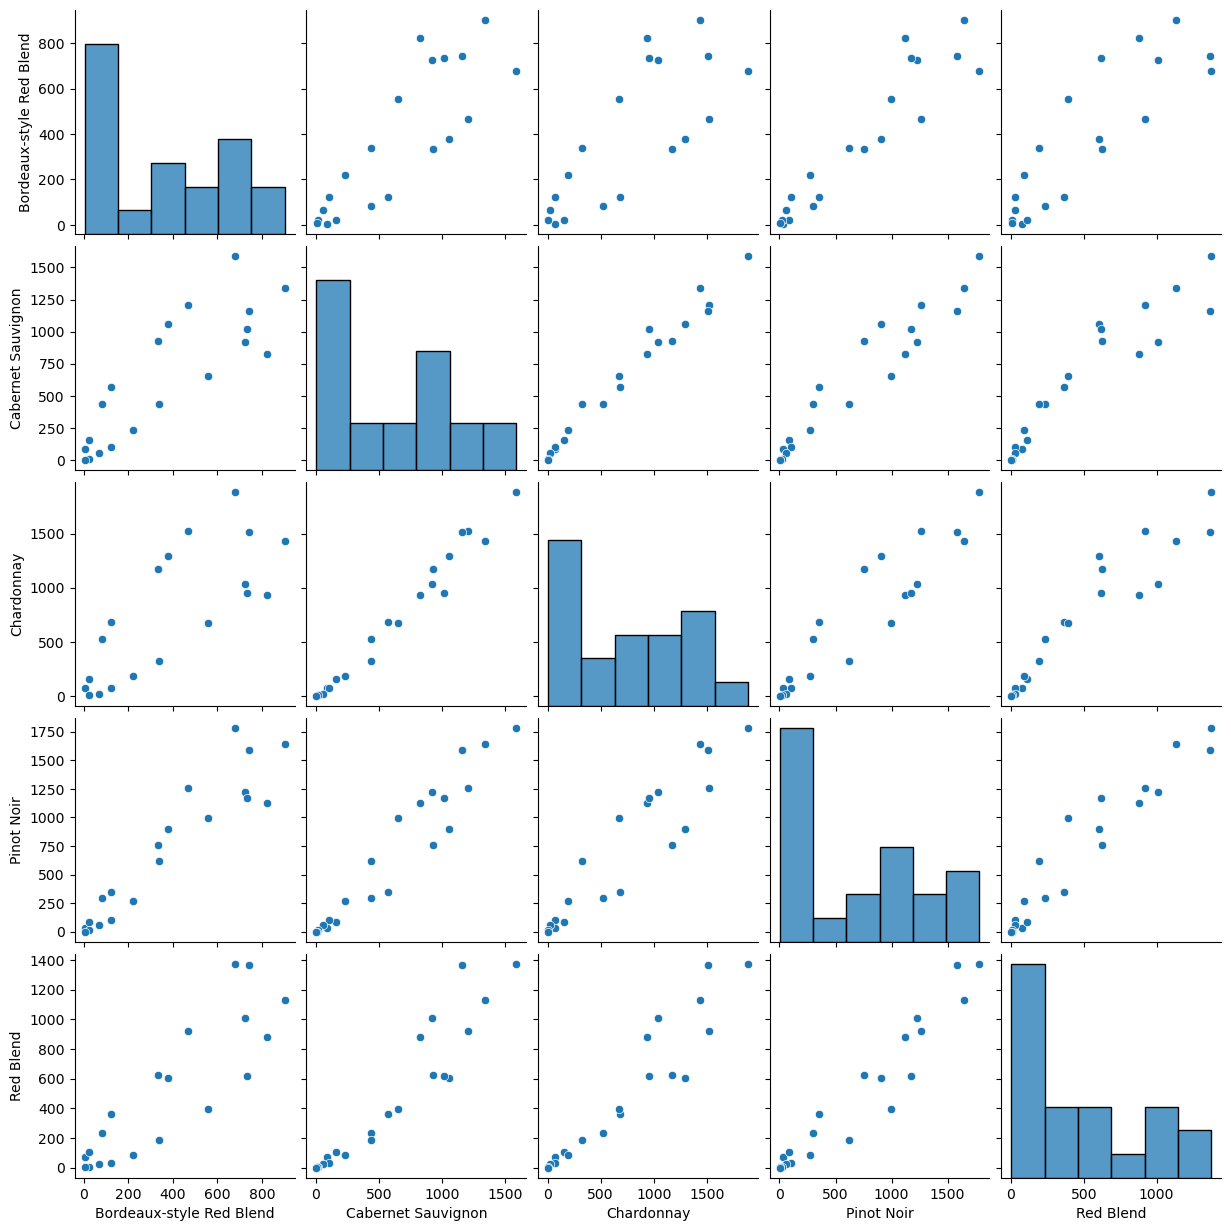

In [15]:
sns.pairplot(df_new)

15. Visualizzare con pairplot seaborn una comparison tra il prezzo dei vini e i voti associati. Selezionare un sample di 100 elementi e rimuovere prima i valori nulli.

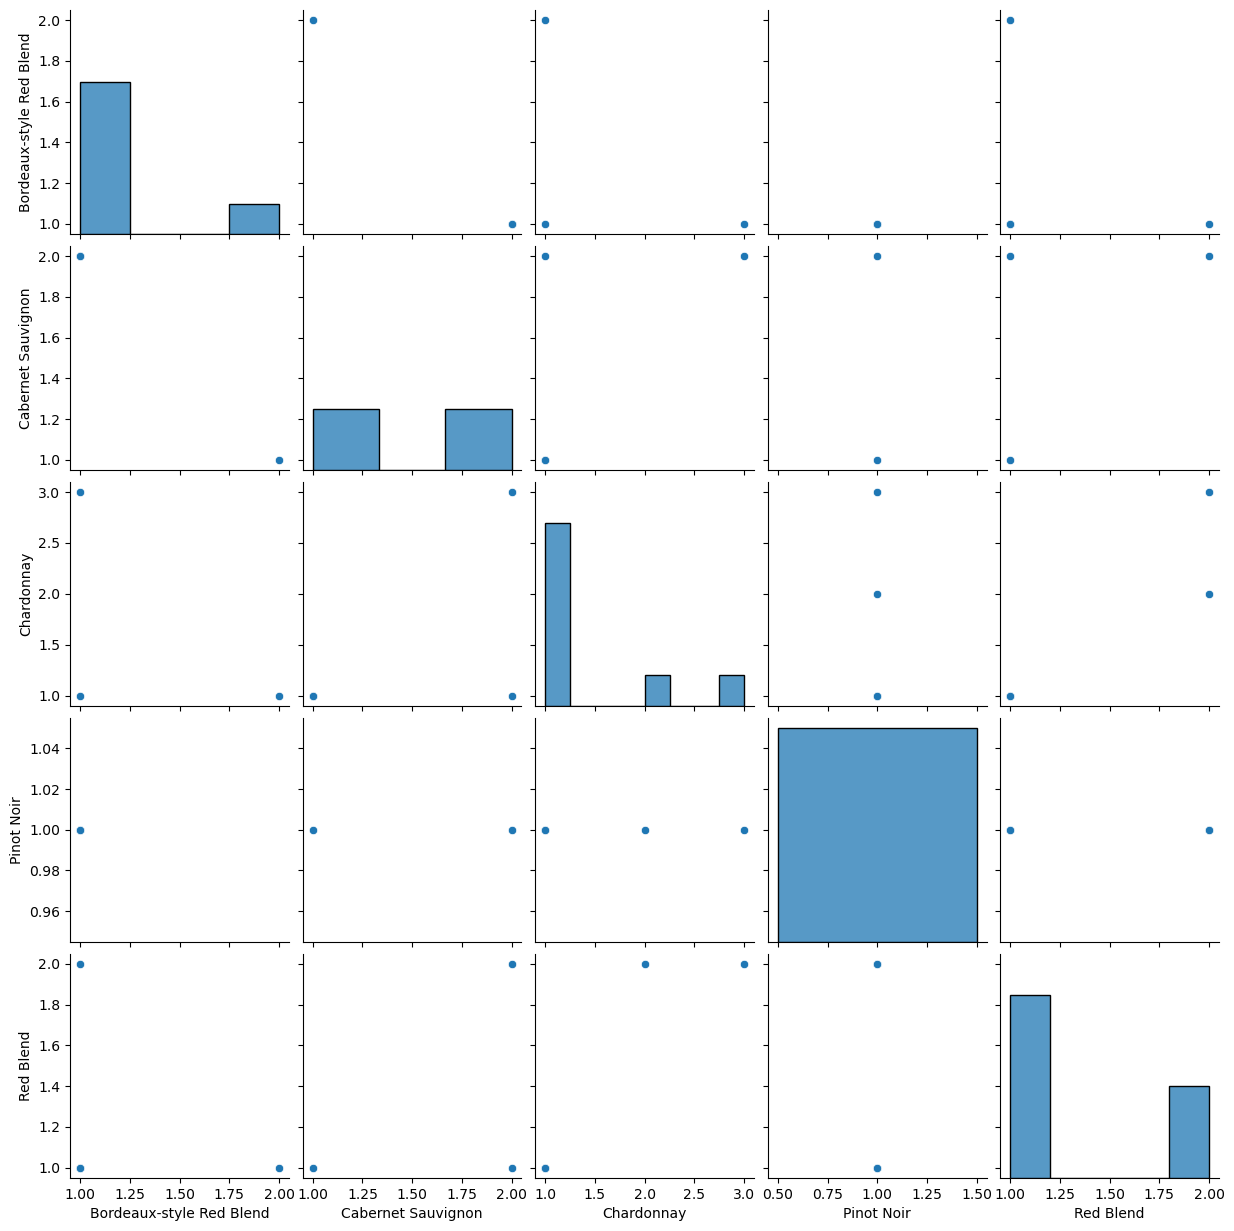

In [20]:
sample = df.sample(100)
sample.dropna()
sample = sample[sample['variety'].isin(vini)].groupby(["points","variety"]).size().unstack()
sns.pairplot(sample)

16. Visualizzare in un heatmap seaborn la correlazione tra il prezzo dei vini e i voti associati.

<Axes: xlabel='variety', ylabel='variety'>

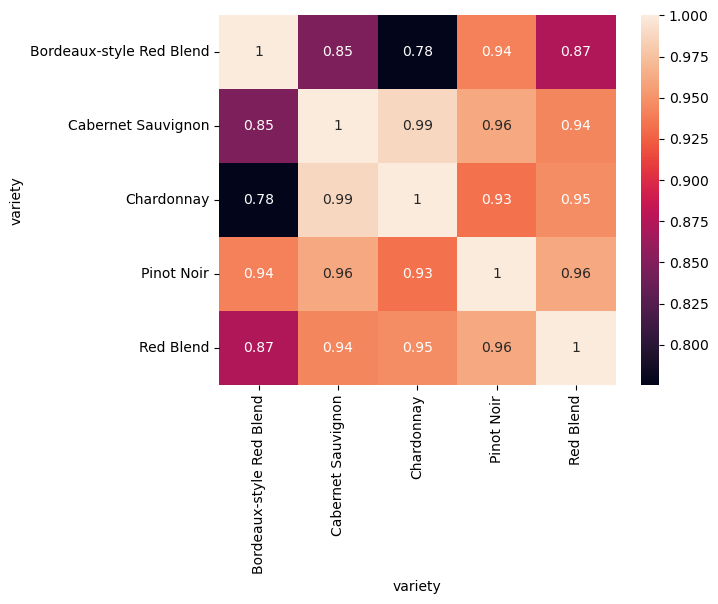

In [18]:
sns.heatmap(df_new.corr(), annot=True)